In [207]:
#import files
import os
import json
import pprint
import pandas as pd
import numpy as np
import requests

import json
import geojson
import folium

import sklearn

from folium.features import GeoJsonTooltip
from geopy.geocoders import Nominatim

import seaborn as sns
import matplotlib.pyplot as plt



In [208]:
#all are from consumerfinance.gov from 1.1.20XX to 12.31.20YY being load as debt_collect_XXYY 

#Product is Debt Collection, Focus on Untimely Response

# loading the json
with open("complaints-debt-collection-untimely-response 2012-2014.json") as debt_collect_1214:
    debt_collect_1214 = json.load(debt_collect_1214) 
    
with open("complaints-debt-collection-untimely-response 2015-2017.json") as debt_collect_1517:
    debt_collect_1517 = json.load(debt_collect_1517) 
    
with open("complaints-debt-collection-untimely-response 2018-2020.json") as debt_collect_1820:
    debt_collect_1820 = json.load(debt_collect_1820) 
    
with open("complaints-debt-collection-untimely-response 2021-2022.json") as debt_collect_2122:
    debt_collect_2122 = json.load(debt_collect_2122) 
    

In [209]:
issue = []
company = []
company_response = []
complaint_long_desc = []
consumer_disputed =[]
state = []
zip_code = []
  
for x in range(len(debt_collect_1214)): 
    company.append(debt_collect_1214[x]['_source']['company'])
    issue.append(debt_collect_1214[x]['_source']['issue'])
    company_response.append(debt_collect_1214[x]['_source']['company_response'])
#     consumer_disputed.append(debt_collect_1214[x]['_source']['consumer_disputed'])
    state.append(debt_collect_1214[x]['_source']['state'])
    zip_code.append(debt_collect_1214[x]['_source']['zip_code'])

debt_1214_df = pd.DataFrame({'issue': issue, "company":company, "company_response":company_response,"state":state, "zip_code": zip_code })

issue = []
company = []
company_response = []
complaint_long_desc = []
consumer_disputed =[]
state = []
zip_code = []
  
for x in range(len(debt_collect_1517)): 
    company.append(debt_collect_1517[x]['_source']['company'])
    issue.append(debt_collect_1517[x]['_source']['issue'])
    company_response.append(debt_collect_1517[x]['_source']['company_response'])
#     consumer_disputed.append(debt_collect_1517[x]['_source']['consumer_disputed'])
    state.append(debt_collect_1517[x]['_source']['state'])
    zip_code.append(debt_collect_1517[x]['_source']['zip_code'])

debt_1517_df = pd.DataFrame({'issue': issue, "company":company, "company_response":company_response, "state":state, "zip_code": zip_code })

issue = []
company = []
company_response = []
complaint_long_desc = []
consumer_disputed =[]
state = []
zip_code = []
  
for x in range(len(debt_collect_1820)): 
    company.append(debt_collect_1820[x]['_source']['company'])
    issue.append(debt_collect_1820[x]['_source']['issue'])
    company_response.append(debt_collect_1820[x]['_source']['company_response'])
#     consumer_disputed.append(debt_collect_1820[x]['_source']['consumer_disputed'])
    state.append(debt_collect_1820[x]['_source']['state'])
    zip_code.append(debt_collect_1820[x]['_source']['zip_code'])

debt_1820_df = pd.DataFrame({'issue': issue, "company":company, "company_response":company_response, "state":state, "zip_code": zip_code })

issue = []
company = []
company_response = []
complaint_long_desc = []
consumer_disputed =[]
state = []
zip_code = []

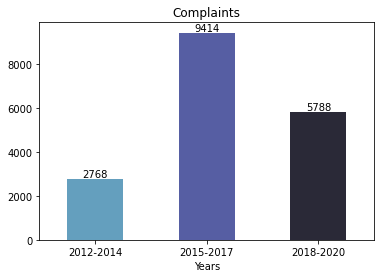

In [211]:
#color palete
sns.set_palette('icefire')

#data
categories = ['2012-2014', '2015-2017', '2018-2020']
values = [len(debt_1214_df), len(debt_1517_df), len(debt_1820_df)]

# Create bar plot
sns.barplot(x=categories, y=values, width=0.5)

# Add value annotations to the bars
for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Set plot labels and title
plt.xlabel('Years')
plt.title('Complaints')

# Display the plot
plt.show()

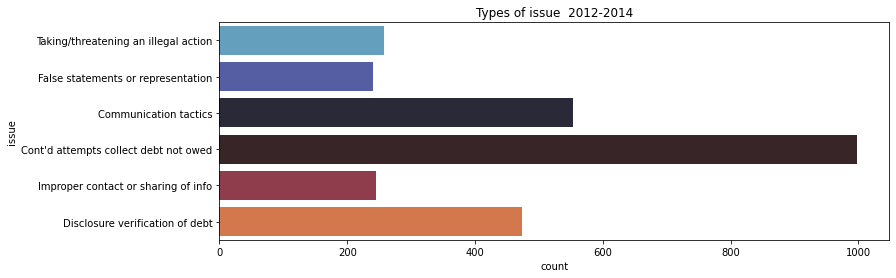

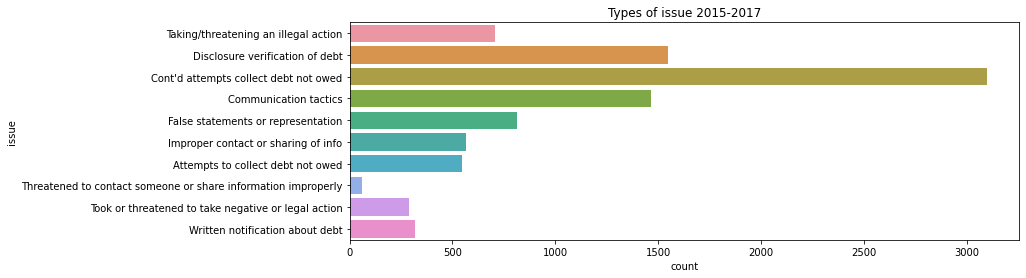

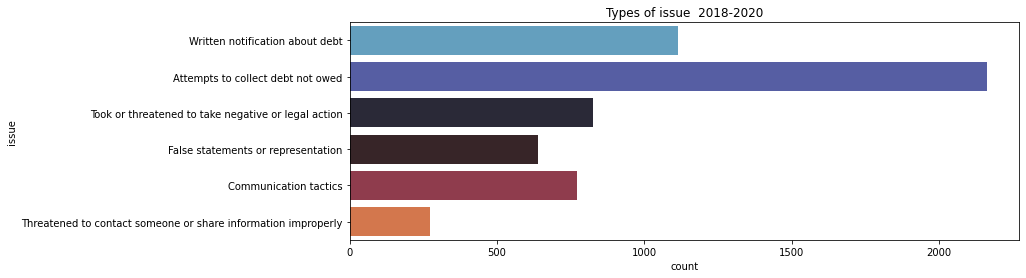

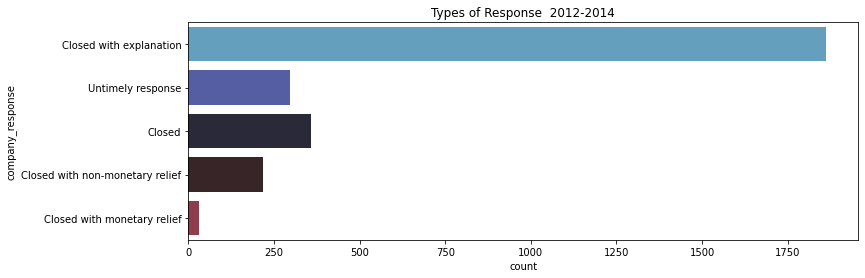

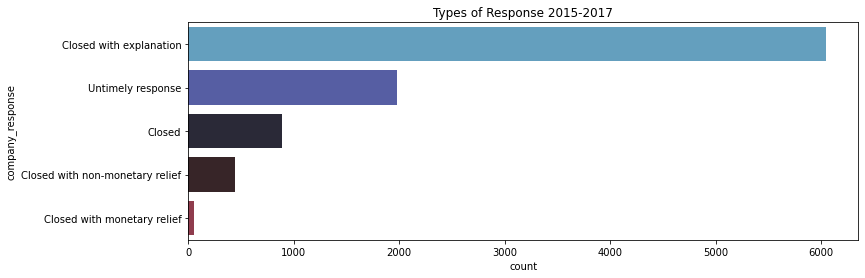

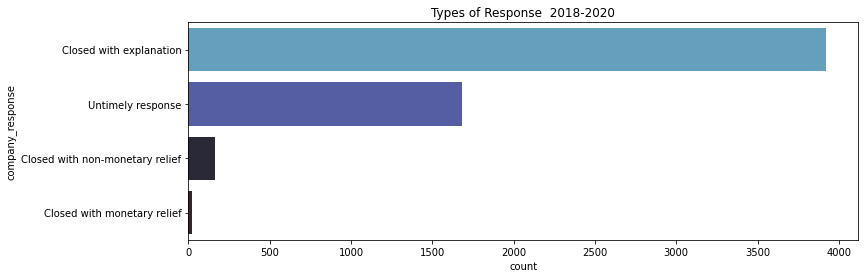

In [217]:
#color palete
sns.set_palette('icefire')

# Bar Plot 1
plt.figure(figsize=(12, 4))
sns.countplot(y='issue', data=debt_1214_df)
plt.title('Types of issue  2012-2014')
plt.show()

# Bar Plot 2
plt.figure(figsize=(12, 4))
sns.countplot(y='issue', data=debt_1517_df,)
plt.title('Types of issue 2015-2017')
plt.show()

# Bar Plot 3
plt.figure(figsize=(12, 4))
sns.countplot(y='issue', data=debt_1820_df,)
plt.title('Types of issue  2018-2020')
plt.show()


# Bar Plot Types of Response  2012-2014
plt.figure(figsize=(12, 4))
sns.countplot(y='company_response', data=debt_1214_df)
plt.title('Types of Response  2012-2014')
plt.show()

# Bar Plot Types of Response 2015-2017
plt.figure(figsize=(12, 4))
sns.countplot(y='company_response', data=debt_1517_df,)
plt.title('Types of Response 2015-2017')
plt.show()

# Bar Plot Types of Response  2018-2020
plt.figure(figsize=(12, 4))
sns.countplot(y='company_response', data=debt_1820_df,)
plt.title('Types of Response  2018-2020')
plt.show()



As per category, we see that more data cleaning and normalization are needed. Responses are much easier to categorize, though a simple "Closed" seem to no longer be used in 2018.

2015-2017 have far more complaints.

#our SK Learns moddel should look at state. Focue on Closed with Monetary Relief. 

Data from state population,issue, and see how much can be closed with Monetary relief. From the CFPB api, the data started collectinf from mid-2013. New dataset wll be pulled from 2014-2022